# Исследовательский проект

Бершицкий Дмитрий, Пономарев Николай

Данные взяты из https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv

In [458]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [459]:
df_source = pd.read_csv('car-selling.csv')
df = df_source.copy()

In [460]:
df_source

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,"4,585.00","1,890.00","1,785.00",7.00,70.00
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,"3,495.00","1,550.00","1,500.00",5.00,32.00
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,"3,795.00","1,680.00","1,427.00",5.00,45.00
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,"4,936.00","1,868.00","1,479.00",5.00,65.00


In [461]:
# Посмотрим на типы данных и наличие пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [462]:
# Посчитаем количество Null значений для каждой переменной
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

# 1. Описание датасета

Датасет содержит 20 столбцов и 2059 строк. В нем содержатся следующие переменные:

| Переменная          | Описание                          | Тип переменной             | Тип данных | Единицы            | Пропуски |
|---------------------|---------------------------------|----------------------------|------------|--------------------|----------|
| Make               | Марка автомобиля               | Категориальная (номинальная) | string     | -                  | 0        |
| Model              | Модель автомобиля             | Категориальная (номинальная) | string     | -                  | 0        |
| Price              | Цена автомобиля               | Метрическая                 | integer    | INR                | 0        |
| Year               | Год выпуска                   | Метрическая                 | integer    | год                | 0        |
| Kilometer          | Пробег автомобиля            | Метрическая                 | integer    | км                 | 0        |
| Fuel Type         | Тип топлива                   | Категориальная (номинальная) | string     | -                  | 0        |
| Transmission       | Тип трансмиссии              | Категориальная (номинальная) | string     | -                  | 0        |
| Location          | Город продажи                 | Категориальная (номинальная) | string     | -                  | 0        |
| Color             | Цвет автомобиля               | Категориальная (номинальная) | string     | -                  | 0        |
| Owner             | Количество владельцев         | Категориальная (порядковая)  | string     | -                  | 0        |
| Seller Type       | Тип продавца                  | Категориальная (номинальная) | string     | -                  | 0        |
| Engine           | Объем двигателя              | Метрическая                 | string     | см³                | 80       |
| Max Power        | Макс. мощность               | Метрическая                 | string     | л.с. @ об/мин      | 80       |
| Max Torque       | Макс. крутящий момент         | Метрическая                 | string     | Нм @ об/мин        | 80       |
| Drivetrain       | Тип привода                   | Категориальная (номинальная) | string     | -                  | 136      |
| Length           | Длина автомобиля             | Метрическая                 | float      | мм                 | 64       |
| Width            | Ширина автомобиля            | Метрическая                 | float      | мм                 | 64       |
| Height           | Высота автомобиля            | Метрическая                 | float      | мм                 | 64       |
| Seating Capacity | Кол-во мест                  | Метрическая                 | float      | -                  | 64       |
| Fuel Tank Capacity | Объем бака                 | Метрическая                 | float      | литры              | 113      |


# 2. Изменение типов данных

Для начала переведем Engine, Max Power и Max Torque в float.

1) Engine содержит значения в виде '1197 cc', '1498 cc' и т.д., поэтому уберем 'cc' и преобразуем в int.
2) Max Power содержит значения в виде '90 bhp @ 6000 rpm', '103 bhp @ 3600 rpm' и т.д., поэтому уберем ' bhp @ 3000 rpm' и преобразуем в int, так как количество оборотов, при котором достигается максимальная мощность, нас не интересует.
3) Max Torque содержит значения в виде '113 Nm @ 4200rpm', '250 Nm @ 1500-2500rpm' и т.д., поэтому уберем ' Nm @ 4200rpm' и преобразуем в int, так как количество оборотов, при котором достигается максимальный крутящий момент, нас не интересует.

In [463]:
# Преобразуем только те строки, которые не NaN
df['Engine'] = df['Engine'].str.replace(' cc', '').dropna().astype(float)
df['Max Power'] = df['Max Power'].str.split('@').str[0].str.replace('bhp', '').dropna().astype(float)
df['Max Torque'] = df['Max Torque'].str.split('@').str[0].str.replace('Nm', '').dropna().astype(float)

Приведем Owner к числовому виду, где 1 - один владелец, 2 - два владельца и т.д.

In [464]:
df['Owner'].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car',
       '4 or More'], dtype=object)

In [465]:
df[df['Owner'] == 'UnRegistered Car']

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
139,Audi,Q5 45 TFSI Premium Plus,5651000,2022,1,Petrol,Automatic,Delhi,Blue,UnRegistered Car,Individual,"1,984.00",248.00,370.00,AWD,"4,663.00","1,898.00","1,659.00",5.00,70.00
194,Audi,Q3 2.0 TDI quattro Premium,1350000,2012,72000,Diesel,Automatic,Hyderabad,White,UnRegistered Car,Individual,"1,968.00",174.00,380.00,AWD,"4,385.00","1,831.00","1,608.00",5.00,64.00
222,Audi,A6 2.0 TFSi Technology Pack,7200000,2021,20000,Petrol,Automatic,Bangalore,White,UnRegistered Car,Individual,"1,984.00",180.00,320.00,FWD,"4,915.00","1,874.00","1,455.00",5.00,75.00
362,Honda,City ZX CVT Petrol,1700000,2022,8530,Petrol,Automatic,Pune,White,UnRegistered Car,Individual,"1,498.00",119.00,145.00,FWD,"4,549.00","1,748.00","1,489.00",5.00,40.00
389,Toyota,Innova 2.0 V,575000,2013,82000,Petrol,Manual,Varanasi,Gold,UnRegistered Car,Individual,"1,998.00",136.00,182.00,NaN,"4,555.00","1,770.00","1,755.00",8.00,55.00
479,Mercedes-Benz,GLC 220d 4MATIC Progressive,6400000,2022,5500,Diesel,Automatic,Hyderabad,White,UnRegistered Car,Individual,"1,950.00",192.00,400.00,AWD,"4,658.00","1,890.00","1,644.00",5.00,66.00
756,Mercedes-Benz,C-Class 220 CDI AT,5400000,2022,4600,Diesel,Automatic,Bangalore,White,UnRegistered Car,Individual,"2,148.00",170.00,410.00,RWD,"4,596.00","1,770.00","1,447.00",5.00,66.00
815,Renault,Kwid 1.0 RXT [2016-2019],420000,2017,43000,Petrol,Manual,Hyderabad,Grey,UnRegistered Car,Individual,999.00,67.00,91.00,FWD,"3,679.00","1,579.00","1,478.00",5.00,28.00
839,Mercedes-Benz,A-Class Sedan 200d,4100000,2022,3826,Diesel,Automatic,Ahmedabad,White,UnRegistered Car,Individual,"1,950.00",147.00,320.00,FWD,"4,549.00","1,796.00","1,446.00",5.00,43.00
861,Audi,A4 Premium Plus 40 TFSI,4200000,2021,12321,Petrol,Automatic,Delhi,Black,UnRegistered Car,Individual,"1,984.00",188.00,320.00,FWD,"4,762.00","1,847.00","1,433.00",5.00,54.00


Заметим, что есть небольшое количество машин без регистрации, причем они в основном достаточно новые. Поэтому для таких авто будем считать, что у них был 1 владелец.

In [466]:
# Заменим значения в столбце 'Owner' на числовые
df['Owner'] = df['Owner'].replace({
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4,
    'UnRegistered Car': 1,
    '4 or More': 5
})

Посмотрим на изменения в df:

In [467]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,1,Corporate,"1,198.00",87.00,109.00,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,2,Individual,"1,248.00",74.00,190.00,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,1,Individual,"1,197.00",79.00,112.76,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,1,Individual,"1,197.00",82.00,113.00,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,1,Individual,"2,393.00",148.00,343.00,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,1,Individual,"2,179.00",138.00,330.00,FWD,"4,585.00","1,890.00","1,785.00",7.00,70.00
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,2,Individual,814.00,55.00,75.00,FWD,"3,495.00","1,550.00","1,500.00",5.00,32.00
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,1,Individual,"1,196.00",70.00,102.00,FWD,"3,795.00","1,680.00","1,427.00",5.00,45.00
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,1,Individual,"1,995.00",188.00,400.00,RWD,"4,936.00","1,868.00","1,479.00",5.00,65.00


# 3. Обработка пропусков

Как мы заметили, пропуски есть у переменных Engine, Max Power, Max Torque, Drivetrain, Length, Width, Height, Seating Capacity, Fuel Tank Capacity.

Заполним все пропуски медианой (в случае числовых переменных) или модой (в случае категориальной Drivetrain).

In [468]:
df['Engine'] = df['Engine'].fillna(df['Engine'].median())
df['Max Power'] = df['Max Power'].fillna(df['Max Power'].median())
df['Max Torque'] = df['Max Torque'].fillna(df['Max Torque'].median())
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].median())
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median())

In [469]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

Больше пропусков нет!

# 4. Новый столбец на основе предыдущих

Рассчитаем для каждой машины среднегодовой пробег. Эта информация может быть полезной, чтобы понять, насколько машина была эксплуатирована.

Автор не указал, в каком году был сделан датасет. Найдем год выпуска самой новой машины и будем считать, что данные актуальны на этот год.

In [470]:
max_year = df['Year'].max()
df['Kilometer Per Year'] = df['Kilometer'] / (max_year + 1 - df['Year'])

# 5. Категориальная переменная из метрической

В датасете есть некоторое количество машин с маленьким пробегом. Вероятно, это машины, которые были куплены, но не использовались или были куплены на перепродажу. Будем считать, что:

- Машина с пробегом менее 1000 км - новая
- Машина с пробегом от 1000 до 10000 км - почти новая
- Машина с пробегом от 10000 - б/у

In [471]:
df['Kilometer Category'] = pd.cut(df['Kilometer'], bins=[-1, 1000, 10000, df['Kilometer'].max()],
                                  labels=['New', 'Almost New', 'Used'])

In [472]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Kilometer Per Year,Kilometer Category
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,1,...,87.00,109.00,FWD,"3,990.00","1,680.00","1,505.00",5.00,35.00,"14,525.00",Used
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,2,...,74.00,190.00,FWD,"3,995.00","1,695.00","1,555.00",5.00,42.00,"8,333.33",Used
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,1,...,79.00,112.76,FWD,"3,585.00","1,595.00","1,550.00",5.00,35.00,"5,583.33",Used
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,1,...,82.00,113.00,FWD,"3,995.00","1,745.00","1,510.00",5.00,37.00,"9,375.00",Used
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,1,...,148.00,343.00,RWD,"4,735.00","1,830.00","1,795.00",7.00,55.00,"13,800.00",Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,1,...,138.00,330.00,FWD,"4,585.00","1,890.00","1,785.00",7.00,70.00,"12,900.00",Used
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,2,...,55.00,75.00,FWD,"3,495.00","1,550.00","1,500.00",5.00,32.00,"9,222.22",Used
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,1,...,70.00,102.00,FWD,"3,795.00","1,680.00","1,427.00",5.00,45.00,"7,300.00",Used
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,1,...,188.00,400.00,RWD,"4,936.00","1,868.00","1,479.00",5.00,65.00,"12,094.80",Used


# 6. Цель и задачи исследования

Целью исследования является разносторонний анализ данных о продаже автомобилей:

- Выявление зависимостей между переменными
- Построение моделей для прогнозирования цены автомобиля и типа трансмиссии
- Выявление кластеров автомобилей

Задачи исследования:

1. Сформулировать гипотезы исследования.
2. Выявить тенденции и взаимосвязи, используя графики, сводные таблицы и описательные статистики.
3. Выявить корреляции между переменными.
4. Построить модель линейной регрессии для прогнозирования цены автомобиля.
5. Построить модель бинарной регрессии для прогнозирования типа трансмиссии автомобиля.
6. Провести кластерный анализ автомобилей.
7. Проверить, подтверждаются ли ранее сформулированные гипотезы.

# 7. Гипотезы исследования

**ToDo: лучше оставить только гипотезы по линейной и бинарной регрессии и сделать их менее общими, по принципу одна переменная - одна гипотеза.**

Сформулируем ряд гипотез:

1. Гипотеза о взаимосвязи переменных:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не имеют взаимосвязи между собой.
- Альтернативная гипотеза (H₁):
H₁: переменные имеют взаимосвязь между собой.

2. Гипотеза о корреляции переменных:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не коррелируют между собой.
- Альтернативная гипотеза (H₁):
H₁: переменные коррелируют между собой.

3. Гипотеза о влиянии факторов на цену автомобиля:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не имеют статистически значимого влияния на цену автомобиля.
- Альтернативная гипотеза (H₁):
H₁: переменные имеют статистически значимое влияние на цену автомобиля.

4. Гипотеза о влиянии факторов на тип трансмиссии автомобиля:

- Основная гипотеза (H₀):
H₀: переменные ('Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Kilometer Per Year', 'Kilometer Category') не имеют статистически значимого влияния на вероятность того, что автомобиль будет иметь автоматическую или механическую трансмиссию.
- Альтернативная гипотеза (H₁):
H₁: переменные имеют статистически значимое влияние на вероятность того, что автомобиль будет иметь автоматическую или механическую трансмиссию.

5. Гипотеза о кластеризации автомобилей:

- Основная гипотеза (H₀):
H₀: данные о продаже автомобилей не могут быть разделены на кластеры.
- Альтернативная гипотеза (H₁):
H₁: данные о продаже автомобилей могут быть разделены на кластеры.

# 8. Визуализация данных

Построим графики для визуализации данных.

## 8.1. Распределение числовых переменных

Посмотрим, как распределены Price, Engine и Fuel Tank Capacity.

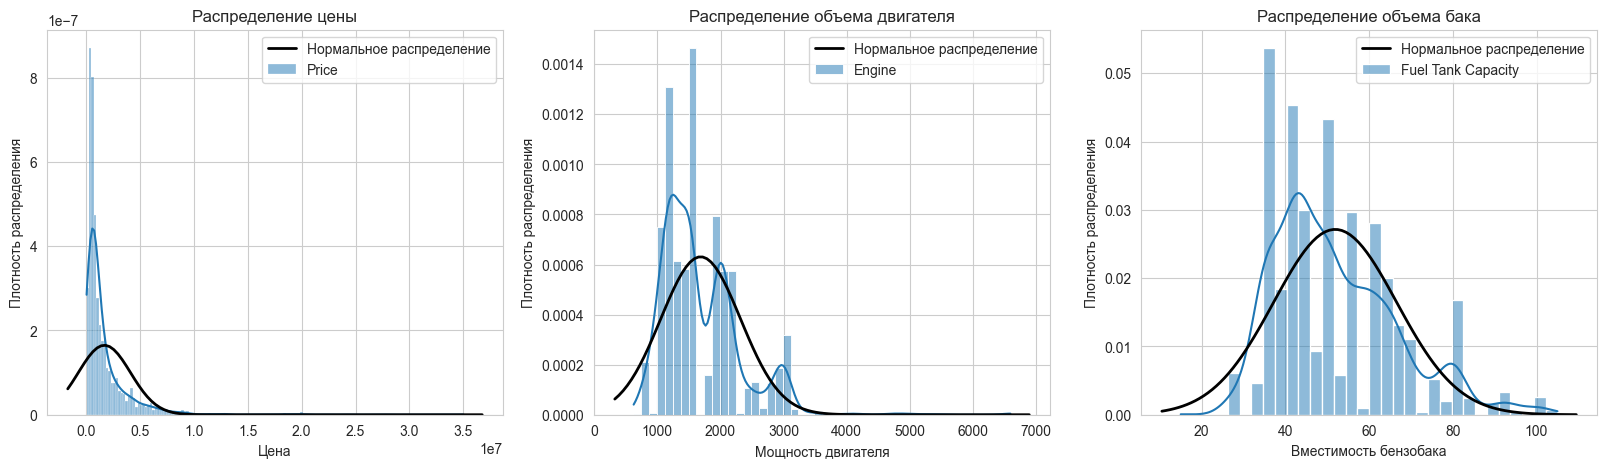

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define the columns to plot
columns = ['Price', 'Engine', 'Fuel Tank Capacity']
titles = ['Распределение цены', 'Распределение объема двигателя', 'Распределение объема бака']
xlabels = ['Цена', 'Мощность двигателя', 'Вместимость бензобака']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the columns and plot
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, stat="density", ax=axes[i], label=col)
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, df[col].mean(), df[col].std())
    axes[i].plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    axes[i].legend()
    axes[i].set_xlabel(xlabels[i])
    axes[i].set_ylabel('Плотность распределения')
    axes[i].set_title(titles[i])

# Show the plots
plt.show()

Ни одна из переменных не имеет нормального распределения. Распределение цены сильно вмещена влево, а распределения мощности двигателя и вместимости бака имеют несколько пиков.

### 8.2. Распределение категориальных переменных

Посмотрим, как распределены Fuel Type, Transmission и Drivetrain.

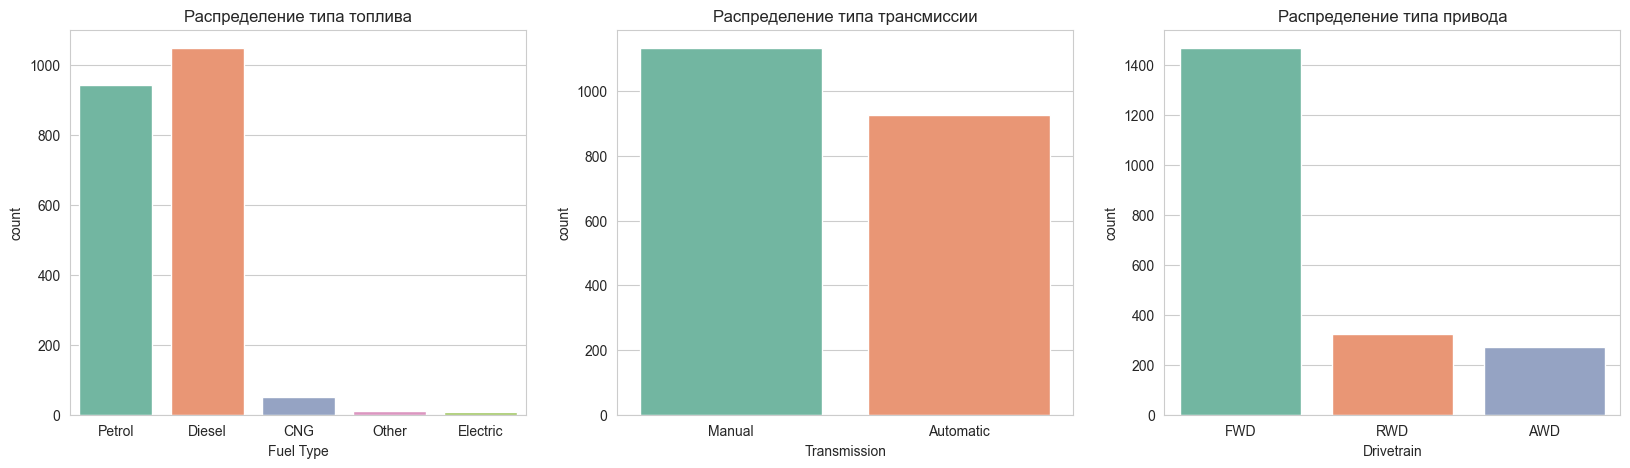

In [474]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

df_fuel = df.copy()
df_fuel['Fuel Type'] = df_fuel['Fuel Type'].apply(
    lambda x: x if x in ['Petrol', 'Diesel', 'CNG', 'Electric'] else 'Other')

sns.countplot(x='Fuel Type', data=df_fuel, ax=axes[0], palette='Set2')
axes[0].set_title('Распределение типа топлива')

sns.countplot(x='Transmission', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Распределение типа трансмиссии')

sns.countplot(x='Drivetrain', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Распределение типа привода')

plt.show()

Большинство автомобилей работают на дизеле, хотя бензиновых также много. Небольшую, но заметную долю занимают автомобили на сжиженном газе. Электромобили встречаются крайне редко.

Большинство автомобилей имеют механическую трансмиссию, хотя автоматических коробок не сильно меньше.

Большинство автомобилей имеют передний привод, RWD и AWD сильно меньше и примерно поровну.

### 8.3. Количество выпущенных автомобилей в зависимости от года выпуска и трансмиссии

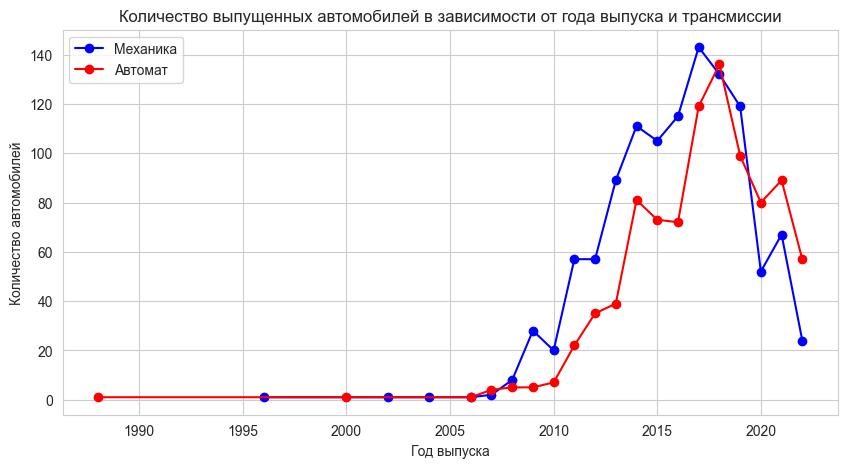

In [475]:
df_manual = df[df['Transmission'] == 'Manual']
df_automatic = df[df['Transmission'] == 'Automatic']

year_count_manual = df_manual.groupby("Year")["Transmission"].count()
year_count_automatic = df_automatic.groupby("Year")["Transmission"].count()

plt.figure(figsize=(10, 5))
plt.plot(year_count_manual.index, year_count_manual.values, marker="o", linestyle="-", color="b", label="Механика")
plt.plot(year_count_automatic.index, year_count_automatic.values, marker="o", linestyle="-", color="r", label="Автомат")

plt.xlabel("Год выпуска")
plt.ylabel("Количество автомобилей")
plt.title("Количество выпущенных автомобилей в зависимости от года выпуска и трансмиссии")
plt.legend()
plt.grid(True)

plt.show()

Заметим, что большинство новых авто работают на "автомате". При этом авто, выпущенные до 2017 года, были в основном на "механике".

### 8.4. Взаимосвязь цены и мощности двигателя

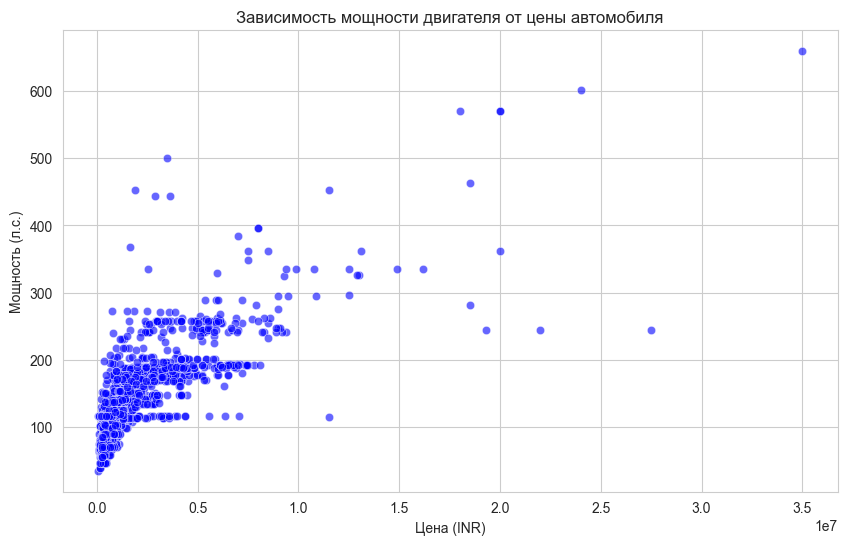

In [476]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Price"], y=df["Max Power"], color="b", alpha=0.6)

plt.xlabel("Цена (INR)")
plt.ylabel("Мощность (л.с.)")
plt.title("Зависимость мощности двигателя от цены автомобиля")
plt.grid(True)

plt.show()

Хотя видна положительная корреляция между ценой и мощностью, среди машин средней ценовой категории (1-4 млн INR) найдутся такие, которые по мощности не хуже вариантов за 10-15 млн INR.

### 8.5. Взаимосвязь трансмиссии и топлива

<Axes: xlabel='Is Manual'>

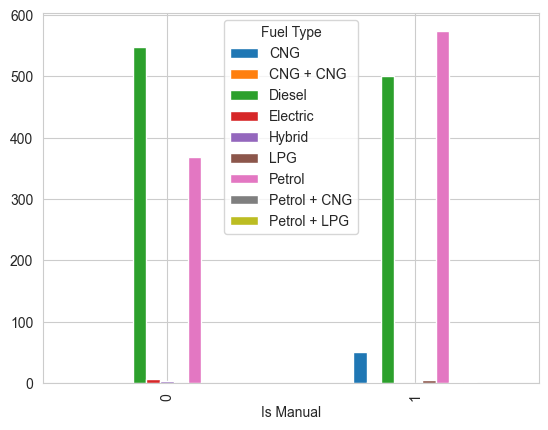

In [477]:
df_is_manual = df.copy()
df_is_manual['Is Manual'] = df_is_manual['Transmission'].replace({'Manual': 1, 'Automatic': 0})

ct = pd.crosstab(df_is_manual['Is Manual'], df_is_manual['Fuel Type'])
ct.plot.bar()

Результат достаточно неожиданный: среди автомобилей на "автомате" у большинства дизельный двигатель, хотя среди механических коробок бензиновых машин больше. Также стоит отметить, что среди автомобилей на сжиженном газе нет машин с автоматической коробкой.

# 9. Сводные таблицы

### 9.1. Средняя стоимость машины каждого бренда в зависимости от состояния автомобиля (новая, почти новая, б/у)

In [478]:
pd.options.display.float_format = '{:,.2f}'.format

pd.pivot_table(df, index='Make', columns='Kilometer Category', values='Price', aggfunc='mean', fill_value=0)

Kilometer Category,New,Almost New,Used
Make,,,
Audi,"4,901,000.00","6,216,666.67","2,580,704.90"
BMW,0.00,"5,687,857.14","3,651,140.33"
Chevrolet,0.00,0.00,"341,285.57"
Datsun,0.00,"425,000.00","279,714.29"
Ferrari,0.00,"35,000,000.00",0.00
Fiat,0.00,0.00,"305,000.00"
Ford,0.00,"3,975,000.00","1,421,425.51"
Honda,"700,000.00","1,226,750.00","589,120.78"
Hyundai,0.00,"1,272,049.90","689,902.66"


Можно заметить, что в датасете оказалось мало новых машин. Как ни странно, *новые* машины некоторого бренда не всегда дороже *почти новых* машин это же бренда. В любом случае, таких машин слишком мало, чтобы делать содержательные выводы.

При этом, как и ожидалось, почти новые машины дороже, чем б/у. Разница сильнее всего у премиум-брендов:

- Mercedes-Benz: машина с пробегом меньше 10000 км в среднем стоит в 7,250,000 INR, а машина с пробегом больше 10000 км - 3,800,000 INR
- Porsche: машина с пробегом меньше 10000 км в среднем стоит в 11,500,000 INR, а машина с пробегом больше 10000 км - 6,200,000 INR

**Хи-квадрат**

К данной таблице не применим хи-квадрат, так как она не содержит информации о частоте встречаемости тех или иных значений.

### 9.2. Количество машин в зависимости от трансмиссии и привода

In [479]:
pd.pivot_table(df, index='Transmission', columns='Drivetrain', values='Price', aggfunc='count', fill_value=0)

Drivetrain,AWD,FWD,RWD
Transmission,,,
Automatic,238,465,223
Manual,34,1001,98


Подавляющее большинство машин на механике имеют передний привод. Среди автомобилей на автомате также больше машин с передним приводом, но разница меньше.

**Хи-квадрат**

In [480]:
pivot = pd.pivot_table(df, index='Transmission', columns='Drivetrain', values='Price', aggfunc='count', fill_value=0)

test = stats.chi2_contingency(pivot)
print('chi2 = ', test[0], '   p-value =', test[1])

chi2 =  380.68578164487224    p-value = 2.1633801787076446e-83


p-value < 0.05, поэтому выводы, сделанные по таблице, можно считать статистически значимыми.

### 9.3. Количество проданных машин в зависимости от вида топлива для каждого года изготовления, начиная с 2010

In [481]:
df_since_2010 = df[df['Year'] >= 2010]
df_since_2010 = df_since_2010[df_since_2010['Fuel Type'].isin(['Petrol', 'Diesel'])]

pd.pivot_table(df_since_2010, index='Fuel Type', columns='Year', values='Price', aggfunc='count', fill_value=0)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Fuel Type,,,,,,,,,,,,,
Diesel,8,25,50,77,111,101,113,140,151,105,67,58,29
Petrol,19,50,40,47,75,69,72,117,115,103,58,88,49


Можно сделать такие выводы:

- Из машин 2010-2011 года выпуска большинство работают на бензине.
- Из машин 2012-2020 года выпуска большинство работают на дизеле.
- Из машин 2021-2020 года выпуска большинство работают на бензине.

**Хи-квадрат**

In [482]:
pivot = pd.pivot_table(df_since_2010, index='Fuel Type', columns='Year', values='Price', aggfunc='count', fill_value=0)

test = stats.chi2_contingency(pivot)
print('chi2 = ', test[0], '   p-value =', test[1])

chi2 =  53.271102275453075    p-value = 3.6861787780201744e-07


p-value < 0.05, поэтому выводы, сделанные по таблице, можно считать статистически значимыми.